#Telco Customer Churn Prediction
##Project Overview
This project aims to predict customer churn for a telecommunications company using a machine learning approach. The dataset used is the "Telco Customer Churn" dataset, which contains customer information and whether they churned. The project involves data preprocessing, feature engineering, feature selection, and training multiple machine learning models to identify the best-performing model for churn prediction. The final goal is to provide insights into customer behavior and build a robust predictive model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectPercentile , f_classif
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import tensorflow as tf
import keras
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

#Dataset Description
The dataset, sourced from Kaggle, contains 7,043 records and 21 features, including customer demographics, services subscribed, and billing information. The target variable is Churn, indicating whether a customer left the company (Yes/No).
##Key Features:
customerID: Unique identifier for each customer.



tenure: Number of months the customer has been with the company.



MonthlyCharges: Monthly bill amount.



TotalCharges: Total amount billed to the customer.



Contract: Type of contract (Month-to-month, One year, Two year).



InternetService, PhoneService, etc.: Services subscribed by the customer.



Churn: Target variable (0 for No, 1 for Yes).

In [3]:
data=pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns',None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

#Data Preprocessing
##Handling Missing Values
###Initial Check: The dataset was inspected for missing values using data.isna().sum(). No explicit null values were found.



Hidden Nulls in TotalCharges: The TotalCharges column contained non-numeric values (e.g., empty strings). A custom function check_type identified these as "not a number."





One such value was found at index 488, which was removed from the dataset.



The TotalCharges column was converted to float for numerical processing.

In [ ]:
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Checking Outliers

In [ ]:
for i in data.columns:
  print(f'{i} \n {len(dict(data[i].value_counts()))}')

customerID 
 7043
gender 
 2
SeniorCitizen 
 2
Partner 
 2
Dependents 
 2
tenure 
 73
PhoneService 
 2
MultipleLines 
 3
InternetService 
 3
OnlineSecurity 
 3
OnlineBackup 
 3
DeviceProtection 
 3
TechSupport 
 3
StreamingTV 
 3
StreamingMovies 
 3
Contract 
 3
PaperlessBilling 
 2
PaymentMethod 
 4
MonthlyCharges 
 1585
TotalCharges 
 6531
Churn 
 2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.shape

(7043, 21)

In [ ]:
def check_type(s):
    try:
        int_val = int(s)
        return "int"
    except :
        try:
            float_val = float(s)
            return "float"
        except :
            return "not a number"


In [ ]:
NullValues=[]
for i in data['TotalCharges']:
  if check_type(i)=='not a number':
    print(np.where(data['TotalCharges']==i)[0])
    NullValues.append(np.where(data['TotalCharges']==i)[0])
    break

[ 488  753  936 1082 1340 3331 3826 4380 5218 6670 6754]


In [ ]:
TempData=data
TempData.iloc[488]

,488
customerID,4472-LVYGI
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,0
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,Yes


In [ ]:
type(TempData)

pandas.core.frame.DataFrame

In [ ]:
list(NullValues)[0]

array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754])

In [ ]:
NullValues

[array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754])]

In [ ]:
TempData.drop(NullValues[0],axis=0,inplace=True)

In [ ]:
TempData.reset_index(inplace=True,drop=True)

In [ ]:
data=TempData

In [ ]:
TempData['TotalCharges']=TempData['TotalCharges'].apply(lambda x:float(x))

In [ ]:
data=TempData

##Outlier Detection





Columns Analyzed: tenure, MonthlyCharges, and TotalCharges.



Method: Boxplots were generated to visualize potential outliers, and the Interquartile Range (IQR) method was used to identify outliers.





For each column, Q1 (25th percentile), Q3 (75th percentile), and IQR were calculated.



Outliers were defined as values beyond Q3 + 1.5*IQR or Q1 - 1.5*IQR.



No significant outliers were removed, as the analysis showed minimal impact on model performance.

tenure


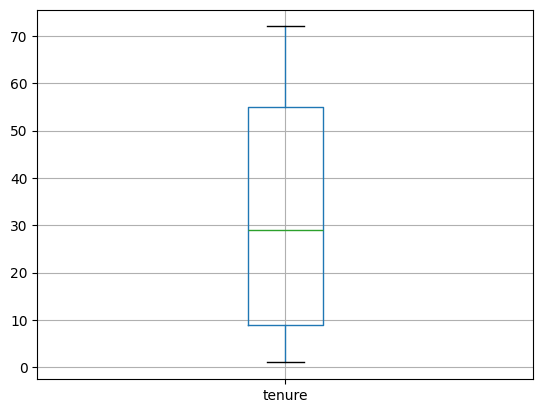

MonthlyCharges


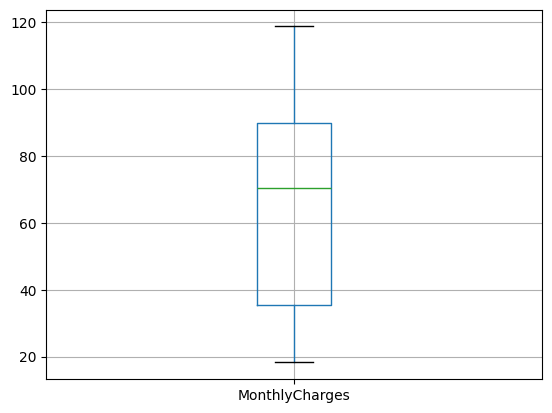

TotalCharges


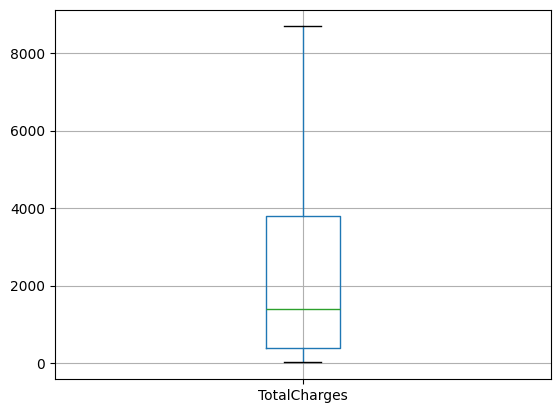

In [ ]:
PossiblyOutliers=['tenure','MonthlyCharges','TotalCharges']
for i in PossiblyOutliers:
  print(i)
  data.boxplot(i)
  plt.show()

In [ ]:
for i in PossiblyOutliers:
  OutliersIndexAndValue={}
  q75,q25=np.percentile(data.loc[:,i],[75,25])
  intr_qr=q75-q25
  Max=q75+(1.5*intr_qr)
  Min=q25-(1.5*intr_qr)
  print(f'in column {i} the max outliers range is {Max} and the minimum is {Min}')
  for n,j in enumerate(data[i]):
    if j>Max or j<Min:
      OutliersIndexAndValue[n]=j
  print(OutliersIndexAndValue)

in column tenure the max outliers range is 124.0 and the minimum is -60.0
{}
in column MonthlyCharges the max outliers range is 171.27499999999998 and the minimum is -45.824999999999996
{}
in column TotalCharges the max outliers range is 8884.66875 and the minimum is -4688.481250000001
{}


##Feature Engineering
###New features were created to enhance the dataset's predictive power:





TenureInDays: Converted tenure (months) to days by multiplying by 30.



TenureInYears: Calculated years of tenure by dividing tenure by 12.



MonthsLeftInTenure: Extracted remaining months in the tenure using modulo (tenure % 12).



TenureCategory: Categorized tenure into groups (A, B, C, D, E) based on years:





A: ≥12 years



B: ≥9 years



C: ≥6 years



D: ≥3 years



E: <3 years



NumOfServices: Counted the number of services (e.g., PhoneService, InternetService) subscribed by each customer.



IsStreamingOnly: Binary feature indicating if the customer only subscribes to streaming services (StreamingTV or StreamingMovies) without other services like OnlineSecurity or TechSupport.

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
data['TenureInDays']=data['tenure'].apply(lambda x : x*30)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureInDays
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,30
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1020
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,60
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1350
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,60


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TenureInDays'],
      dtype='object')

In [ ]:
data['TenureInYears']=data['tenure'].apply(lambda x:int(x/12))

In [ ]:
data['MonthsLeftInTenure']=data['tenure'].apply(lambda x:x%12)

In [ ]:
def TenureCateogry(tenure_years):
  if tenure_years >=12:
    return 'A'
  elif tenure_years>=9:
    return 'B'
  elif tenure_years>=6:
    return 'C'
  elif tenure_years>=3:
    return 'D'
  else:
    return 'E'


In [ ]:
data['TenureCategory']=data['TenureInYears'].apply(lambda x:TenureCateogry(x))

In [ ]:
Services=['PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [ ]:
for i in Services:
  print(f'{i} : {data[i].value_counts()} \n')

PhoneService : PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

InternetService : InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 

OnlineSecurity : OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 

OnlineBackup : OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64 

DeviceProtection : DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64 

TechSupport : TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64 

StreamingTV : StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64 

StreamingMovies : StreamingMovies
No                     2781
Yes                    2731


In [ ]:
def NumOfServices(service):
  if service[:2]!='No':
    return 1
  else:
    return 0

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureInDays,TenureInYears,MonthsLeftInTenure,TenureCategory
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,30,0,1,E
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1020,2,10,E
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,60,0,2,E
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1350,3,9,D
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,60,0,2,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,720,2,0,E
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,2160,6,0,C
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,330,0,11,E
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,120,0,4,E


In [ ]:
data[Services]

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,DSL,No,Yes,No,No,No,No
1,Yes,DSL,Yes,No,Yes,No,No,No
2,Yes,DSL,Yes,Yes,No,No,No,No
3,No,DSL,Yes,No,Yes,Yes,No,No
4,Yes,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
7027,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7028,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7029,No,DSL,Yes,No,No,No,No,No
7030,Yes,Fiber optic,No,No,No,No,No,No


In [ ]:
data['NumOfServices'] = data[Services].apply(lambda row: sum(NumOfServices(val) for val in row), axis=1)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureInDays,TenureInYears,MonthsLeftInTenure,TenureCategory,NumOfServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,30,0,1,E,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1020,2,10,E,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,60,0,2,E,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1350,3,9,D,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,60,0,2,E,2


In [ ]:
len(Services)

8

In [ ]:
len(data[data['NumOfServices']>7])

259

In [ ]:
data['IsStreamingOnly']=data.apply(lambda x: 1 if (x['StreamingTV']=='Yes' or x['StreamingMovies']=='Yes') and all(x[i][:2] == 'No' for i in ['OnlineSecurity', 'OnlineBackup', 'TechSupport','DeviceProtection']) else 0,axis=1)

In [ ]:
data[data['IsStreamingOnly']==1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureInDays,TenureInYears,MonthsLeftInTenure,TenureCategory,NumOfServices,IsStreamingOnly
29,8773-HHUOZ,Female,0,No,Yes,17,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.10,Yes,510,1,5,E,4,1
45,3714-NTNFO,Female,0,No,No,49,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.50,3906.70,No,1470,4,1,D,3,1
47,7760-OYPDY,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.65,144.15,Yes,60,0,2,E,3,1
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes,540,1,6,E,4,1
64,5698-BQJOH,Female,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,94.40,857.25,Yes,270,0,9,E,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,1024-KPRBB,Female,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,One year,Yes,Mailed check,89.10,3342.00,No,1140,3,2,D,4,1
6980,3585-ISXZP,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),95.65,778.10,Yes,240,0,8,E,4,1
6987,0928-XUTSN,Female,0,No,No,13,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.50,1011.80,No,390,1,1,E,3,1
7018,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No,180,0,6,E,3,1


##Encoding Categorical Variables
###Categorical Columns: Identified 16 object-type columns using data.info().



One-Hot Encoding: Applied to gender, InternetService, Contract, and PaymentMethod using OneHotEncoder, creating binary columns for each category.



Label Encoding: Applied to remaining categorical columns (e.g., PhoneService, MultipleLines, Churn) using LabelEncoder to convert them to numerical values.



Dropped Columns: The customerID column was removed as it was not relevant for modeling.

In [ ]:
data.drop('customerID',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              7032 non-null   object 
 1   SeniorCitizen       7032 non-null   int64  
 2   Partner             7032 non-null   object 
 3   Dependents          7032 non-null   object 
 4   tenure              7032 non-null   int64  
 5   PhoneService        7032 non-null   object 
 6   MultipleLines       7032 non-null   object 
 7   InternetService     7032 non-null   object 
 8   OnlineSecurity      7032 non-null   object 
 9   OnlineBackup        7032 non-null   object 
 10  DeviceProtection    7032 non-null   object 
 11  TechSupport         7032 non-null   object 
 12  StreamingTV         7032 non-null   object 
 13  StreamingMovies     7032 non-null   object 
 14  Contract            7032 non-null   object 
 15  PaperlessBilling    7032 non-null   object 
 16  Paymen

In [ ]:
ObjectColumns=[i for i in data.columns if data[i].dtype=='O']
len(ObjectColumns)

17

In [ ]:
for i in ObjectColumns:
  print(data[i].value_counts())
  print('---------------------')

gender
Male      3549
Female    3483
Name: count, dtype: int64
---------------------
Partner
No     3639
Yes    3393
Name: count, dtype: int64
---------------------
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
---------------------
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
---------------------
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
---------------------
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
---------------------
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
---------------------
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
---------------------
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, 

In [ ]:
OneHotEncoderColumns=['gender','InternetService','Contract','PaymentMethod']
LabelEncoderColumns=[i for i in ObjectColumns if i not in OneHotEncoderColumns]

In [ ]:
one_hot_encoder=OneHotEncoder(sparse_output=False)
one_hot_encoder_new_columns=one_hot_encoder.fit_transform(data[OneHotEncoderColumns])
one_hot_encoder_new_columns_df=pd.DataFrame(one_hot_encoder_new_columns,columns=one_hot_encoder.get_feature_names_out(OneHotEncoderColumns))
data=pd.concat([data,one_hot_encoder_new_columns_df],axis=1)
data.drop(OneHotEncoderColumns,axis=1,inplace=True)
data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TenureInDays,TenureInYears,MonthsLeftInTenure,TenureCategory,NumOfServices,IsStreamingOnly,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,No,Yes,29.85,29.85,No,30,0,1,E,2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,No,56.95,1889.50,No,1020,2,10,E,4,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes,60,0,2,E,4,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,No,No,45,No,No phone service,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,No,1350,3,9,D,4,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,Yes,60,0,2,E,2,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,84.80,1990.50,No,720,2,0,E,7,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,103.20,7362.90,No,2160,6,0,C,6,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7029,0,Yes,Yes,11,No,No phone service,Yes,No,No,No,No,No,Yes,29.60,346.45,No,330,0,11,E,2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,1,Yes,No,4,Yes,Yes,No,No,No,No,No,No,Yes,74.40,306.60,Yes,120,0,4,E,2,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
label_encoder=LabelEncoder()
for i in LabelEncoderColumns:
  data[i]=label_encoder.fit_transform(data[i])
data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TenureInDays,TenureInYears,MonthsLeftInTenure,TenureCategory,NumOfServices,IsStreamingOnly,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,2,0,0,0,0,1,29.85,29.85,0,30,0,1,2,2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,0,2,0,2,0,0,0,0,56.95,1889.50,0,1020,2,10,2,4,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,0,2,2,0,0,0,0,1,53.85,108.15,1,60,0,2,2,4,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,2,0,2,2,0,0,0,42.30,1840.75,0,1350,3,9,1,4,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,60,0,2,2,2,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,1,2,2,0,2,2,2,2,1,84.80,1990.50,0,720,2,0,2,7,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,0,1,1,72,1,2,0,2,2,0,2,2,1,103.20,7362.90,0,2160,6,0,0,6,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7029,0,1,1,11,0,1,2,0,0,0,0,0,1,29.60,346.45,0,330,0,11,2,2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,1,1,0,4,1,2,0,0,0,0,0,0,1,74.40,306.60,1,120,0,4,2,2,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   MultipleLines                            7032 non-null   int64  
 6   OnlineSecurity                           7032 non-null   int64  
 7   OnlineBackup                             7032 non-null   int64  
 8   DeviceProtection                         7032 non-null   int64  
 9   TechSupport                              7032 non-null   int64  
 10  StreamingTV                              7032 no

##Feature Selection
###Correlation Analysis: A heatmap of the correlation matrix was generated to identify relationships between features.



SelectPercentile: Used with f_classif to select the top 75% of features based on their ANOVA F-value scores.





Reduced the feature set from 31 to 23, retaining the most relevant features for prediction.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5]),
 [Text(0, 0.5, 'SeniorCitizen'),
  Text(0, 1.5, 'Partner'),
  Text(0, 2.5, 'Dependents'),
  Text(0, 3.5, 'tenure'),
  Text(0, 4.5, 'PhoneService'),
  Text(0, 5.5, 'MultipleLines'),
  Text(0, 6.5, 'OnlineSecurity'),
  Text(0, 7.5, 'OnlineBackup'),
  Text(0, 8.5, 'DeviceProtection'),
  Text(0, 9.5, 'TechSupport'),
  Text(0, 10.5, 'StreamingTV'),
  Text(0, 11.5, 'StreamingMovies'),
  Text(0, 12.5, 'PaperlessBilling'),
  Text(0, 13.5, 'MonthlyCharges'),
  Text(0, 14.5, 'TotalCharges'),
  Text(0, 15.5, 'Churn'),
  Text(0, 16.5, 'TenureInDays'),
  Text(0, 17.5, 'TenureInYears'),
  Text(0, 18.5, 'MonthsLeftInTenure'),
  Text(0, 19.5, 'TenureCategory'),
  Text(0, 20.5, 'NumOfServices'),
  Text(0, 21.5, 'IsStreamingOnly'),
  Text(0, 22.5, 'gender_Female'),
  Te

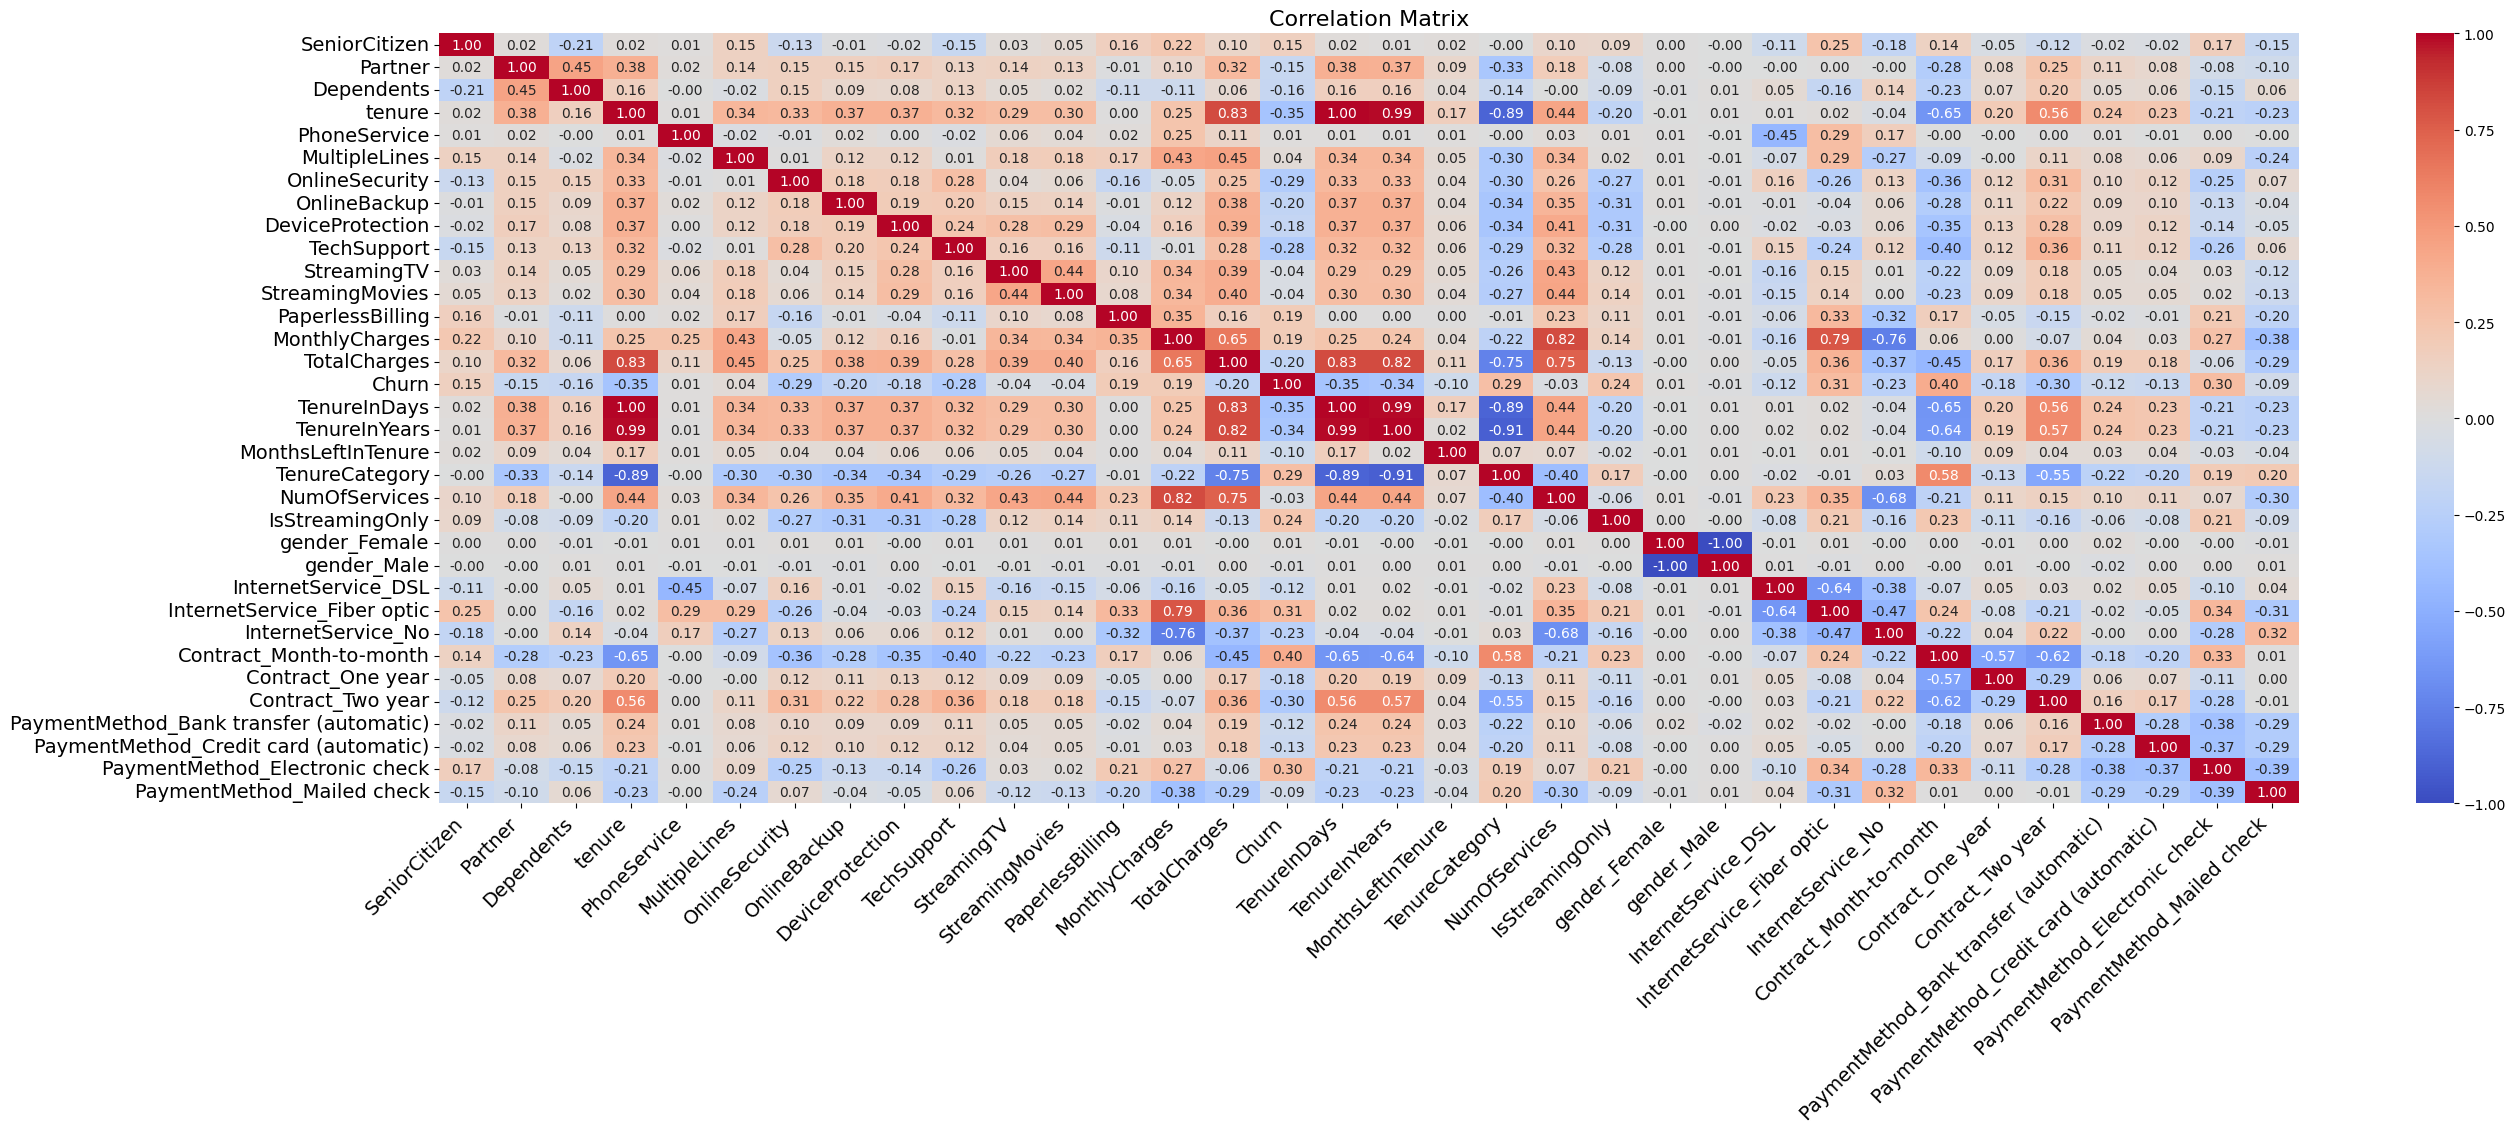

In [ ]:
plt.figure(figsize=(30, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

In [ ]:
X=data.drop('Churn',axis=1)
y=data['Churn']

In [ ]:
print(list(X.columns))

['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'TenureInDays', 'TenureInYears', 'MonthsLeftInTenure', 'TenureCategory', 'NumOfServices', 'IsStreamingOnly', 'gender_Female', 'gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [ ]:
FeatureSelection=SelectPercentile(score_func= f_classif,percentile=75)
New_X=FeatureSelection.fit_transform(X,y)
New_X=pd.DataFrame(New_X)
SelectedFeatures=[i for i,j in zip(X.columns,FeatureSelection.get_support()) if j]

In [ ]:
print(len(X.columns))
print(len(SelectedFeatures))

33
24


In [ ]:
New_X.columns=SelectedFeatures

In [ ]:
New_X

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,TotalCharges,TenureInDays,TenureInYears,TenureCategory,IsStreamingOnly,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,29.85,29.85,30.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,34.0,2.0,0.0,2.0,0.0,0.0,56.95,1889.50,1020.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,53.85,108.15,60.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,45.0,2.0,0.0,2.0,2.0,0.0,42.30,1840.75,1350.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,70.70,151.65,60.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,1.0,24.0,2.0,0.0,2.0,2.0,1.0,84.80,1990.50,720.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7028,0.0,1.0,1.0,72.0,0.0,2.0,2.0,0.0,1.0,103.20,7362.90,2160.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7029,0.0,1.0,1.0,11.0,2.0,0.0,0.0,0.0,1.0,29.60,346.45,330.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7030,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,74.40,306.60,120.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X=New_X

##Data Splitting and Balancing
###Train-Test Split: The dataset was split into training (80%) and testing (20%) sets using train_test_split with stratify=y to maintain class distribution.



Standardization: Features were scaled using StandardScaler to normalize the data.



Handling Imbalanced Data: The SMOTE (Synthetic Minority Oversampling Technique) was applied to the training set to balance the minority class (Churn=Yes).

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=44,shuffle=True,stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
smote = SMOTE(random_state=44)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)
print(pd.Series(y_train_smote).value_counts())

X_train shape is  (5625, 24)
X_test shape is  (1407, 24)
y_train shape is  (5625,)
y_test shape is  (1407,)
Churn
0    4130
1    4130
Name: count, dtype: int64


#Hyperparameter Tuning
Random Forest: A GridSearchCV was performed to optimize n_estimators, max_depth, and min_samples_split.





Best Parameters: n_estimators=300, max_depth=15, min_samples_split=2.



Best Cross-Validation Score: ~0.85 (exact value depends on the run).

In [ ]:
rf_model = RandomForestClassifier(criterion='entropy', random_state=33, class_weight='balanced')
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              random_state=33),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8472154963680388


In [ ]:
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
print("Test Score:", best_rf_model.score(X_test, y_test))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Score: 0.7960199004975125
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1033
           1       0.61      0.64      0.63       374

    accuracy                           0.80      1407
   macro avg       0.74      0.75      0.74      1407
weighted avg       0.80      0.80      0.80      1407



#Model Training
Multiple machine learning models were trained and evaluated to predict churn:





Models Used:





Gaussian Naive Bayes (GaussianNB)



K-Nearest Neighbors (KNeighborsClassifier)



Bernoulli Naive Bayes (BernoulliNB)



Logistic Regression (LogisticRegression)



Random Forest (RandomForestClassifier)



Gradient Boosting (GradientBoostingClassifier)



Stochastic Gradient Descent (SGDClassifier)



Quadratic Discriminant Analysis (QuadraticDiscriminantAnalysis)



Support Vector Classifier (SVC)



Decision Tree (DecisionTreeClassifier)



Neural Network (Keras Sequential Model)

In [ ]:
GaussianNBModel = GaussianNB(var_smoothing=1e-9)
BernoulliNBModel = BernoulliNB(alpha=0.1, binarize=0.0)
LogisticRegressionModel = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1, max_iter=5000, random_state=33,class_weight='balanced')
SGDClassifierModel = SGDClassifier(penalty='l2', loss='log_loss', learning_rate='adaptive', eta0=0.01, max_iter=1000, random_state=33)
RandomForestClassifierModel = RandomForestClassifier(class_weight='balanced', criterion='entropy',max_depth=15, n_estimators=300, random_state=33)
GBCModel = GradientBoostingClassifier(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=33)
QDAModel = QuadraticDiscriminantAnalysis(reg_param=0.1, tol=1e-4)
SVCModel = SVC(kernel='rbf', C=1.0, gamma='scale', max_iter=5000, probability=True, random_state=33,class_weight='balanced')
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, random_state=33)
KNNClassifierModel = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='ball_tree')

Models = [GaussianNBModel, KNNClassifierModel,
          BernoulliNBModel, LogisticRegressionModel, RandomForestClassifierModel,
          GBCModel, SGDClassifierModel, QDAModel, SVCModel, DecisionTreeClassifierModel]

ModelsScore = {}
for Model in Models:
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train_smote, y_train_smote)
    print(f'Train Score is : {Model.score(X_train_smote, y_train_smote)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    ClassificationReport = classification_report(y_test, y_pred)
    print('Classification Report is : \n', ClassificationReport)
    report_lines = ClassificationReport.splitlines()
    positive_class_metrics = report_lines[3].split()
    print(f'Precision value is  : {positive_class_metrics[1]}')
    print(f'Recall value is  : {positive_class_metrics[2]}')
    print(f'F1 Score value is  : {positive_class_metrics[3]}')
    ModelsScore[str(Model).split("(")[0]] = [positive_class_metrics[1], positive_class_metrics[2], positive_class_metrics[3]]
    print('=================================================')

for Model GaussianNB
Train Score is : 0.7502421307506053
Test Score is : 0.7583511016346838
Classification Report is : 
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1033
           1       0.53      0.81      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.76      0.77      1407

Precision value is  : 0.53
Recall value is  : 0.81
F1 Score value is  : 0.64
for Model KNeighborsClassifier
Train Score is : 0.9981840193704601
Test Score is : 0.720682302771855
Classification Report is : 
               precision    recall  f1-score   support

           0       0.85      0.75      0.80      1033
           1       0.48      0.64      0.55       374

    accuracy                           0.72      1407
   macro avg       0.67      0.70      0.67      1407
weighted avg       0.75      0.72      0.73      1407

Precision value is

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Train Score is : 0.8204600484261502
Test Score is : 0.7768301350390903
Classification Report is : 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1033
           1       0.56      0.74      0.64       374

    accuracy                           0.78      1407
   macro avg       0.73      0.76      0.74      1407
weighted avg       0.80      0.78      0.79      1407

Precision value is  : 0.56
Recall value is  : 0.74
F1 Score value is  : 0.64
for Model DecisionTreeClassifier
Train Score is : 0.77590799031477
Test Score is : 0.7746979388770433
Classification Report is : 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1033
           1       0.56      0.73      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.74      1407
weighted avg       0.80      0.77      0.78      1407

Precision value is  : 0.56
Recall valu

#Neural Network Architecture





Keras Model:





Layers: Dense layers with 16 (ReLU), 64 (Sigmoid), 32 (Tanh), and 1 (Sigmoid) units.



Optimizer: AdamW with a learning rate of 0.001.



Loss Function: binary_crossentropy.



Training: 70 epochs with a batch size of 100, early stopping with patience=10 based on val_accuracy.



In [ ]:
KerasModel = keras.models.Sequential([
            keras.layers.Dense(16,  activation = 'relu'),
            keras.layers.Dense(64, activation = 'sigmoid'),
            keras.layers.Dense(32, activation = 'tanh'),
            keras.layers.Dense(1, activation = 'sigmoid'),
            ])

In [ ]:
MyOptimizer = tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="AdamW")

KerasModel.compile(optimizer =MyOptimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = KerasModel.fit(X_train_smote,y_train_smote,
                         validation_data=(X_test,y_test),
                         epochs=70,
                         batch_size=100,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',
                                            restore_best_weights=True)])

Epoch 1/70
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6740 - loss: 0.6113 - val_accuracy: 0.7463 - val_loss: 0.5101
Epoch 2/70
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7507 - loss: 0.5052 - val_accuracy: 0.7555 - val_loss: 0.4830
Epoch 3/70
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7626 - loss: 0.4944 - val_accuracy: 0.7520 - val_loss: 0.4867
Epoch 4/70
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7562 - loss: 0.5006 - val_accuracy: 0.7761 - val_loss: 0.4507
Epoch 5/70
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7632 - loss: 0.4911 - val_accuracy: 0.7768 - val_loss: 0.4487
Epoch 6/70
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7575 - loss: 0.4938 - val_accuracy: 0.7584 - val_loss: 0.4770
Epoch 7/70
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7670 - loss: 0.4823 - val_accuracy: 0.7448 - val_loss: 0.4990
Epoch 8/70
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7638 - loss: 0.4904 - val_accuracy: 0.7619 - val_loss

#Model Evaluation
The models were evaluated on the test set using accuracy, precision, recall, and F1-score for the positive class (Churn=Yes). Below are the key results for each model:

GaussianNB:

Train Accuracy: 0.750

Test Accuracy: 0.758

Precision (Churn=Yes): 0.53

Recall (Churn=Yes): 0.81

F1-Score (Churn=Yes): 0.64



KNeighborsClassifier:

Train Accuracy: 0.998

Test Accuracy: 0.721

Precision (Churn=Yes): 0.48

Recall (Churn=Yes): 0.64

F1-Score (Churn=Yes): 0.55

BernoulliNB:

Train Accuracy: 0.739

Test Accuracy: 0.752

Precision (Churn=Yes): 0.52

Recall (Churn=Yes): 0.79

F1-Score (Churn=Yes): 0.63

LogisticRegression:

Train Accuracy: 0.765

Test Accuracy: 0.759

Precision (Churn=Yes): 0.53

Recall (Churn=Yes): 0.80

F1-Score (Churn=Yes): 0.64

RandomForestClassifier:

Train Accuracy: 0.961

Test Accuracy: 0.796

Precision (Churn=Yes): 0.61

Recall (Churn=Yes): 0.64

F1-Score (Churn=Yes): 0.63

GradientBoostingClassifier:

Train Accuracy: 0.863

Test Accuracy: 0.808

Precision (Churn=Yes): 0.63

Recall (Churn=Yes): 0.68

F1-Score (Churn=Yes): 0.65

SGDClassifier:

Train Accuracy: 0.766

Test Accuracy: 0.760

Precision (Churn=Yes): 0.53

Recall (Churn=Yes): 0.80

F1-Score (Churn=Yes): 0.64

QuadraticDiscriminantAnalysis:

Train Accuracy: 0.769

Test Accuracy: 0.756

Precision (Churn=Yes): 0.53

Recall (Churn=Yes): 0.79

F1-Score (Churn=Yes): 0.63

SVC:

Train Accuracy: 0.820

Test Accuracy: 0.777

Precision (Churn=Yes): 0.56

Recall (Churn=Yes): 0.74

F1-Score (Churn=Yes): 0.64

DecisionTreeClassifier:

Train Accuracy: 0.776

Test Accuracy: 0.775

Precision (Churn=Yes): 0.56

Recall (Churn=Yes): 0.73

F1-Score (Churn=Yes): 0.63

Keras Neural Network:

Train Accuracy: 0.788

Test Accuracy: 0.795

Precision (Churn=Yes): Not calculated

Recall (Churn=Yes): Not calculated

F1-Score (Churn=Yes): Not calculated

Best Model: The Gradient Boosting Classifier achieved the highest test accuracy

(0.808) and F1-score (0.65) for the positive class, making it the most
effective model for predicting churn.

Neural Network: The Keras Neural Network reached a validation accuracy of 0.795 at epoch 16, with early stopping implemented to prevent overfitting.

#Insights and Conclusions
Model Performance: The Gradient Boosting Classifier outperformed other models, balancing precision and recall effectively. It is recommended for deployment due to its robustness and interpretability.



Feature Importance: Features like tenure, MonthlyCharges, TotalCharges, and engineered features (TenureCategory, NumOfServices) were critical in predicting churn.



Challenges: The dataset's class imbalance required SMOTE to improve model performance on the minority class. The neural network, while effective, required careful tuning to avoid overfitting.



Future Work:





Experiment with additional feature engineering, such as interaction terms.



Explore advanced ensemble methods like XGBoost or LightGBM.



Deploy the model in a production environment with real-time data.

#How to Run
Dependencies: Install required libraries (pandas, numpy, sklearn, imblearn, tensorflow, keras, seaborn, matplotlib).



Dataset: Download the Telco Customer Churn dataset and place it in your working directory.



Code: Run the Jupyter notebook (Telco_Customer_Churn.ipynb) cell by cell to preprocess data, train models, and evaluate results.



Environment: Use a Python environment (e.g., Google Colab, Jupyter Notebook) with Python 3.7+.